In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from utils import calc_distance, calc_center_of_mass, update
import matplotlib._color_data as mcd
import matplotlib.animation

In [4]:
TOLERANCE = 1e-5

mu1_x = 0
mu1_y = 1

mu2_x = 1
mu2_y = 1

mu3_x = 1
mu3_y = 0

sigma = 0.2

l1 = -1
l2 = 2

m1 = -1
m2 = 2

N = 100
random_points_group_1 = np.array([np.array([random.gauss(mu1_x, sigma), random.gauss(mu1_y, sigma)]) for i in range(N)])
random_points_group_2 = np.array([np.array([random.gauss(mu2_x, sigma), random.gauss(mu2_y, sigma)]) for i in range(N)])
random_points_group_3 = np.array([np.array([random.gauss(mu3_x, sigma), random.gauss(mu3_y, sigma)]) for i in range(N)])

# random_points_group_1 = np.array([np.array([random.uniform(l1, l2), random.uniform(m1, m2)]) for i in range(N)])
# random_points_group_2 = np.array([np.array([random.uniform(l1, l2), random.uniform(m1, m2)]) for i in range(N)])
# random_points_group_3 = np.array([np.array([random.uniform(l1, l2), random.uniform(m1, m2)]) for i in range(N)])


all_points = np.zeros((N * 3, 2))

all_points[0:N, :] = random_points_group_1
all_points[N: 2 * N, :] = random_points_group_2
all_points[2 * N: 3 * N, :] = random_points_group_3

num_of_centroids = 3

centroids_coords = np.array(
    [np.array([random.uniform(l1, l2), random.uniform(m1, m2)]) for i in range(num_of_centroids)])

match_numbers = np.zeros(3 * N, dtype=int)
min_distance = 0

color_list = {}

for i in range(num_of_centroids):
    color_list[i] = np.array([np.array([random.uniform(0.5, 1.), random.uniform(0.5, 1.), random.uniform(0.5, 1.)])])

# markers_list = ['o', ',', 1, 2, 3, 4, 5, 6, 7, 8, 9, 's', 'p', 'h']
markers_list = ['x', 'v', '^', 'o', ',', 4, 5, 6, 7, 8, 9, 's', 'p', 'h']

solution = []
match_numbers_in_time = []

while 1:
    previous_centroids_coords = np.copy(centroids_coords)
    solution.append(previous_centroids_coords)
    for point_idx, point in enumerate(all_points):
        min_distance = 1e9
        closest_centroid = 0
        for centroid_idx, centroid in enumerate(centroids_coords):
            distance = calc_distance(point, centroid)
            if distance < min_distance:
                min_distance = distance
                closest_centroid = centroid_idx

        match_numbers[point_idx] = closest_centroid

    match_numbers_in_time.append(np.copy(match_numbers))

    for centroid_idx, centroid in enumerate(centroids_coords):
        tmp = all_points[match_numbers == centroid_idx]
        if np.shape(tmp)[0] != 0:
            centroids_coords[centroid_idx] = calc_center_of_mass(all_points[match_numbers == centroid_idx])

    unique_match_numbers = np.unique(match_numbers)

    if np.amax(np.abs(previous_centroids_coords - centroids_coords)) < TOLERANCE:
        if np.shape(unique_match_numbers)[0] < num_of_centroids:
            arr = np.arange(num_of_centroids)
            if arr[-1] != unique_match_numbers[-1]:
                centroids_coords[-1] = np.array([random.uniform(l1, l2), random.uniform(m1, m2)])
            else:
                for i in arr:
                    if np.unique(match_numbers)[i] != arr[i]:
                        impostor = np.arange(num_of_centroids)[i]
                        centroids_coords[i] = np.array([random.uniform(l1, l2), random.uniform(m1, m2)])
                        break
        else:
            break

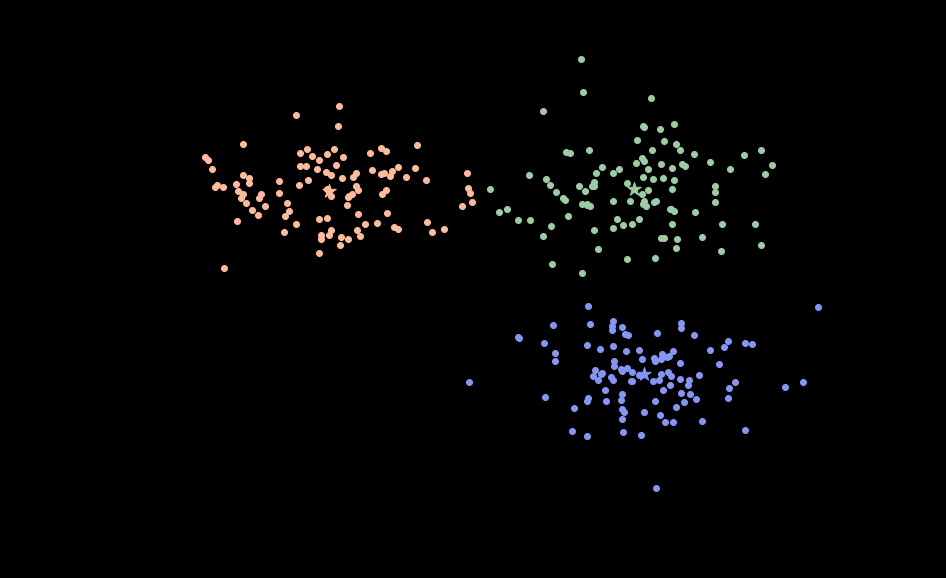

In [9]:
# fig = plt.figure(figsize=(14, 10))
# ax_anim = fig.add_subplot(111)
# ax_anim.set(facecolor='black')
# fig.set(facecolor='black')

# ani = matplotlib.animation.FuncAnimation(fig, update, len(solution),
#                                          fargs=[solution, match_numbers_in_time, all_points, color_list,
#                                                 num_of_centroids, l1, l2, m1, m2, ax_anim, markers_list],
#                                          interval=1000,
#                                          blit=False)
# plt.show()

fig_1 = plt.figure(figsize=(16, 10))
ax = fig_1.add_subplot(111)
ax.set(facecolor='black')
fig_1.set(facecolor='black')
ax.set_xlim(l1, l2)
ax.set_ylim(m1, m2)

for i in range(num_of_centroids):
    ax.scatter(all_points[:, 0][match_numbers == i], all_points[:, 1][match_numbers == i],
               c=color_list[i])

    ax.scatter(centroids_coords[i, 0], centroids_coords[i, 1], c=color_list[i], marker='*', s=200)

plt.show()